# Neural Network of Beijing PM2.5

Machine Learning <br>
Chris Xu <br>
Data Source: https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

import:

In [42]:
import numpy as np
import numpy.random as r
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [43]:
#names = ['NO.', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP',
# 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv')
# out of 43824 samples, there are 2067 missing pm2.5 values
df = df.dropna()
print(df.head(6))
# shuffle the data
df = df.sample(frac=1)
print(df.head(6))

    No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir
24  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0
25  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0
26  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0
27  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0
28  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0
29  30  2010      1    2     5  109.0    -7  -6.0  1022.0   SE  7.14   3   0
          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  \
24647  24648  2012     10   23    23  185.0     7   7.0  1013.0   NW   1.79   
41342  41343  2014      9   19    14   86.0    14  24.0  1010.0   SE   6.26   
20080  20081  2012      4   16    16   40.0   -10  21.0  1013.0   SE  12.52   
27616  27617  2013      2   24    16  318.0    -7   4.0  1023.0   cv   1.78   
21218  21219  2012      6    3     2  178.0    15  21.0  1007.0   

In [44]:
#only take one sample a day in order to get rid of repeated data
df1 = df[df.hour == 12]
print(df1.head(6))
y = np.array(df1['cbwd'])
x = np.array(df1[['pm2.5','DEWP','TEMP','PRES', 'Iws', 'Is', 'Ir']])
print(y.shape)
n = y.shape[0]
#y = y.reshape(n,1)
print(y.shape)

print(x)

for i in range(y.shape[0]):
    if y[i] == 'cv':
        y[i] = 0
    elif y[i] == 'SE':
        y[i] = 1
    elif y[i] == 'NE':
        y[i] = 2
    elif y[i] == 'NW':
        y[i] = 3
print(y[163:200])

          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  \
35436  35437  2014      1   16    12  457.0   -11   2.0  1027.0   NE   5.81   
17244  17245  2011     12   20    12   66.0   -17   3.0  1028.0   NW  35.32   
372      373  2010      1   16    12  148.0   -13  -5.0  1033.0   NW   1.79   
34308  34309  2013     11   30    12   15.0   -17  10.0  1024.0   NW  12.96   
11148  11149  2011      4   10    12   12.0   -17  16.0  1024.0   NE   3.13   
10260  10261  2011      3    4    12   57.0   -13   9.0  1024.0   NW   1.79   

       Is  Ir  
35436   0   0  
17244   0   0  
372     0   0  
34308   0   0  
11148   0   0  
10260   0   0  
(1731,)
(1731,)
[[457.   -11.     2.   ...   5.81   0.     0.  ]
 [ 66.   -17.     3.   ...  35.32   0.     0.  ]
 [148.   -13.    -5.   ...   1.79   0.     0.  ]
 ...
 [121.    24.    28.   ...  17.89   0.     0.  ]
 [ 19.   -10.    22.   ... 227.55   0.     0.  ]
 [106.    -8.     3.   ...   7.6    0.     0.  ]]
[3 3 2 3 2 1 0 3 1

scale the data

In [45]:
scale = StandardScaler()
x_scale = scale.fit_transform(x)

x_scale[0,:] # Looking the new features after scaling

array([ 4.38454012, -0.80279512, -1.19189474,  1.00450823, -0.34129063,
       -0.09078415, -0.13769098])

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.25)
y_train = y_train.reshape((y_train.shape[0]), 1)
y_train=y_train.astype('int')
y_test=y_test.astype('int')
print(x_train.shape)
print(y_train.shape)
print(x_train)

(1298, 7)
(1298, 1)
[[-0.86424709  0.28106047  0.50961843 ... -0.38737157 -0.09078415
  -0.13769098]
 [ 0.24515566  1.22943412  1.53052634 ... -0.37811424 -0.09078415
  -0.13769098]
 [-0.81653084 -1.34472291 -1.36204606 ...  7.69571867 -0.09078415
  -0.13769098]
 ...
 [ 0.34058815  1.56813899  0.67976975 ... -0.35959957 -0.09078415
   2.00954408]
 [-0.36322649  1.36491607  1.10514804 ... -0.39642318 -0.09078415
  -0.13769098]
 [-0.82845991 -1.34472291 -1.10681909 ...  0.75313165 -0.09078415
  -0.13769098]]


code below are modified from homework

In [47]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 4))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

activation function

In [48]:
def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

In [49]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0).
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [50]:
nn_structure = [7, 5, 4]

# train the NN
W, b, avg_cost_func = train_nn(nn_structure, x_train, y_v_train, 3000)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


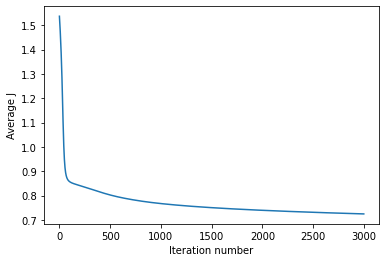

[1.5366268112099712, 1.529812764735348, 1.5227538766474644, 1.5154516524725006, 1.5079082465203686, 1.500126100682053, 1.4921074963143894, 1.4838540397243392, 1.47536611174464, 1.4666423195374856, 1.4576789926213245, 1.4484697643666555, 1.439005274933277, 1.4292730228449215, 1.419257381840477, 1.4089397892995337, 1.3982991041973225, 1.3873121273927764, 1.3759542755085952, 1.3642004013834648, 1.3520257581227315, 1.339407108786608, 1.3263239880743471, 1.3127601240265052, 1.2987050244148812, 1.284155721283349, 1.2691186448643115, 1.2536115619482013, 1.2376654625811656, 1.2213262156039675, 1.2046557477239956, 1.1877324509492044, 1.1706505153051097, 1.1535179448952515, 1.1364531614501503, 1.1195803208203274, 1.1030237208001485, 1.086901892769406, 1.0713220724530028, 1.0563756949770486, 1.0421353675171805, 1.0286534996128476, 1.0159624985206945, 1.0040762331435258, 0.9929923674122852, 0.9826951571821478, 0.9731583646304628, 0.9643480356771621, 0.9562249805195937, 0.9487468778156011, 0.941869

In [51]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()
print(avg_cost_func)
y_pred = predict_y(W, b, x_test, 3)

print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))